# Virtual Scanner 2.0 - Virtual Experiment Pipeline Demo 

This notebook: 
* Generates and examines a 2D UTE sequence from the minTE repository 
* Simulates the sequence using a single slice numerical phantom 
* Reconstructs the data using PyNUFFT and displays the image



First, we install Virtual Scanner 2.0.

In [6]:
!pip install git+https://github.com/imr-framework/virtual-scanner.git@dev

  Cloning https://github.com/imr-framework/virtual-scanner.git (to revision dev) to /tmp/pip-req-build-izyyc39t
  Running command git clone -q https://github.com/imr-framework/virtual-scanner.git /tmp/pip-req-build-izyyc39t
  Running command git checkout -b dev --track origin/dev
  Switched to a new branch 'dev'
  Branch 'dev' set up to track remote branch 'dev' from 'origin'.
  Using cached absl-py-0.7.1.tar.gz (99 kB)
  Using cached astor-0.7.1-py2.py3-none-any.whl (27 kB)
  Using cached Click-7.0-py2.py3-none-any.whl (81 kB)
  Using cached Flask-1.0.2-py2.py3-none-any.whl (91 kB)
  Using cached gast-0.2.2.tar.gz (10 kB)
  Using cached grpcio-1.20.0-cp37-cp37m-manylinux1_x86_64.whl (2.1 MB)
  Using cached h5py-2.9.0-cp37-cp37m-manylinux1_x86_64.whl (2.8 MB)
  Using cached Jinja2-2.10.1-py2.py3-none-any.whl (124 kB)
  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Using cached Keras_Applications-1.0.7-py2.py3-none-any.whl (51 kB)
  Using cached Keras_Preprocessing-1.0.9-py2.

## Sequence generation
This section uses our minTE repository to generate a PyPulseq 2D radial, partially rewound, half-pulse UTE sequence. More information about the sequence can be found within the repository. 


In [7]:
# Grab minTE repo for UTE sequence 
!pip install git+https://github.com/imr-framework/minTE.git

  Cloning https://github.com/imr-framework/minTE.git to /tmp/pip-req-build-zz0pr4po
  Running command git clone -q https://github.com/imr-framework/minTE.git /tmp/pip-req-build-zz0pr4po


Import the necessary functions:

In [8]:
!pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 99 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
virtual-scanner 1.0.26 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
pypulseq 1.3.1.post1 requires matplotlib>=3.3.4, but you have matplotlib 3.1.3 which is incompatible.
minte 0.0.2 requires matplotlib~=3.4.2, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [9]:
# Import 
from sequences.write_UTE_2D import write_UTE_2D_rf_spoiled
import numpy as np 
from scipy.io import savemat, loadmat

A 32 x 32 half-pulse partially rewound (asymmetry factor = 0.97) ultra-short TE sequence is generated using PyPulseq.

In [10]:
# Generate sequence for simulation  
# Half pulse UTE 
Nseq = 16
seq, TE, ktraj = write_UTE_2D_rf_spoiled(N=Nseq, Nr=5*int(Nseq*np.pi), FOV=250e-3, thk=5e-3, FA=5, TR=10e-3,
                                        ro_asymmetry=0.97, use_half_pulse=True, rf_dur=1e-3,
                                        TE_use=None)


TE = 380 us
spoke 1/250 added
spoke 2/250 added
spoke 3/250 added
spoke 4/250 added
spoke 5/250 added
spoke 6/250 added
spoke 7/250 added
spoke 8/250 added
spoke 9/250 added
spoke 10/250 added
spoke 11/250 added
spoke 12/250 added
spoke 13/250 added
spoke 14/250 added
spoke 15/250 added
spoke 16/250 added
spoke 17/250 added
spoke 18/250 added
spoke 19/250 added
spoke 20/250 added
spoke 21/250 added
spoke 22/250 added
spoke 23/250 added
spoke 24/250 added
spoke 25/250 added
spoke 26/250 added
spoke 27/250 added
spoke 28/250 added
spoke 29/250 added
spoke 30/250 added
spoke 31/250 added
spoke 32/250 added
spoke 33/250 added
spoke 34/250 added
spoke 35/250 added
spoke 36/250 added
spoke 37/250 added
spoke 38/250 added
spoke 39/250 added
spoke 40/250 added
spoke 41/250 added
spoke 42/250 added
spoke 43/250 added
spoke 44/250 added
spoke 45/250 added
spoke 46/250 added
spoke 47/250 added
spoke 48/250 added
spoke 49/250 added
spoke 50/250 added
spoke 51/250 added
spoke 52/250 added
spoke 53/

In [11]:
print(f'TE is {TE*1e3} ms.') 

TE is 0.38 ms.


See sequence details with the `Sequence.test_report()` function:

In [12]:
# Print test report to learn details of the sequence file 
print(seq.test_report())

Number of blocks: 2000
Number of events:
RF:    500
Gx:   1500
Gy:   1500
Gz:   1000
ADC:    500
Delay:    500
Sequence duration: 5.005000 s
TE: 0.000429 s
TR: 0.010010 s
Flip angle: 5.00 deg
Unique k-space positions (aka cols, rows, etc.): 4032 3969 
Dimensions: 2
Spatial resolution: 15.81 mm
Spatial resolution: 15.81 mm
Repetitions/slices/contrasts: 2.0
Non-cartesian/irregular encoding trajectory detected (eg: EPI, spiral, radial, etc.)
Event timing check passed successfully
Max gradient: 140000 139989 800000 Hz/m == 3.29 3.29 18.79 mT/m
Max slew rate: 4000000000 3999684177 5333333333 Hz/m/s == 93.95 93.94 125.27 mT/m/s
Max absolute gradient: 800000 Hz/m == 18.79 mT/m
Max absolute slew rate: 5.33333e+09 Hz/m/s == 125.27 T/m/s


Plot the sequence so that the two half pulses with opposite gradient polarities can be seen, as well as gradient and sampling schemes. 

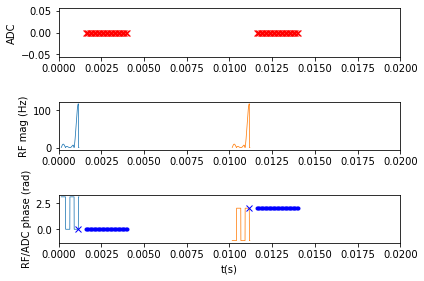

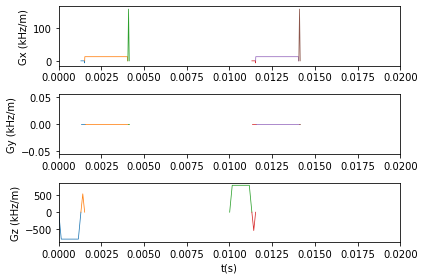

In [13]:
# Plot sequence waveforms (2 TR)
TR = 10e-3 
seq.plot(time_range=[0,2*TR])

Save the sequence as a .seq file and its kspace trajectory as a .mat file. They can be downloaded locally on the left side bar. 

In [14]:
# Download .seq file and kspace trajectory   
seq.write('ute2d_sim.seq')
savemat('ute2d_sim_info.mat',{'ktraj':ktraj,'TE':TE})

# Simulation 
This section runs a Bloch equation based MRI simulation using the sequence just generated and Virtual Scanner's simulation functions.

In [15]:
# Import the simulation functions 
import matplotlib.pyplot as plt
import virtualscanner.server.simulation.bloch.phantom as pht
from pypulseq.Sequence.sequence import Sequence
import time
import multiprocessing as mp
import virtualscanner.server.simulation.bloch.pulseq_blochsim_methods as blcsim

Generate a 2D, 32 x 32 numerical phantom with custom T1, T2, and PD values: 

In [16]:
# Phantom size
Npht = 16
FOV = 0.25

# These are custom T1 (longitudinal relaxation time), T2 (transversal relaxation time), and PD (proton density) values in [seconds]
#T1T2PD0 = [0.5,0.1,1]   # Default values (T1o,T2o,PDo) for use when the other parameters are varied 
#PDs = [1,0.75,0.5] # varying PD (3 values/spheres; a.u. relative to water=1) - only applies to PD plane 
#T1s = 0.25*np.array([1.5,0.6,0.25,0.1]) # varying T1 (4 values/spheres in [seconds]) - only applies to T1 plane
T2s = 2e-3*np.array([0.5,0.15,0.05,0.01]) # varying T2 (4 values/spheres in [seconds]) - only applies to T2 plane 
#T1T2PD1 = [0.5,0.1,1] # Values for the main cylinder fill surrounding the sphere s

# Uniform circle
T1T2PD0 = [0.5,0.1,1]
PDs = [1,1,1]
T1s = [0.5,0.5,0.5,0.5]
#T2s = [0.1,0.1,0.1,0.1]
T1T2PD1 = [0.5,0.1,1]

# Choose a plane option:  
plane_option = 'T2' 

if plane_option == 'T1':
  p = pht.makeCustomCylindricalPhantom(T1T2PD0, PDs, T1s, T2s, T1T2PD1=T1T2PD1, dim=2, n=Npht, dir='z', loc=0, fov=FOV)
elif plane_option == 'T2':
  p = pht.makeCustomCylindricalPhantom(T1T2PD0, PDs, T1s, T2s, T1T2PD1=T1T2PD1, dim=2, n=Npht, dir='z', loc=-FOV/3, fov=FOV)
  p.loc = (0,0,0)
  p.Zs = [0]
elif plane_option == 'PD':
  p = pht.makeCustomCylindricalPhantom(T1T2PD0, PDs, T1s, T2s, T1T2PD1=T1T2PD1, dim=2, n=Npht, dir='z', loc=FOV/3, fov=FOV)
  p.loc = (0,0,0)
  p.Zs = [0]

<class 'numpy.ndarray'>


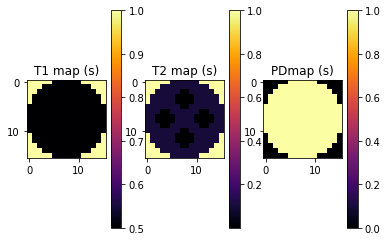

In [17]:
# Display phantom
plt.figure(1)
plt.subplot(131)
plt.imshow(np.squeeze(p.T1map),cmap='inferno')
plt.title('T1 map (s)')
plt.colorbar()

plt.subplot(132)
plt.imshow(np.squeeze(p.T2map),cmap='inferno')
plt.title('T2 map (s)')
plt.colorbar()

plt.subplot(133)
plt.imshow(np.squeeze(p.PDmap),cmap='inferno')
plt.title('PDmap (s)')
plt.colorbar()
plt.show()



Next, set up hardware maps (B0, B1 Tx, B1 Rx). Here, the default maps are used where there all field maps are uniform in space. 

In [18]:
# Set up hardware maps 
# Hardware maps need to match phantom in size 
dfmap = np.zeros((Npht,Npht,1))
txmap = np.ones((Npht,Npht,1))
rxmap = np.ones((Npht,Npht,1))

In [19]:
# Run simulation using multiprocessing
myseq = seq
myphantom = p 

# Time the code: Tic
start_time = time.time()
# Store seq info
seq_info = blcsim.store_pulseq_commands(myseq)
# Get list of locations from phantom
loc_ind_list = myphantom.get_list_inds()
# Initiate multiprocessing pool
pool = mp.Pool(mp.cpu_count())
# Parallel simulation
sg_type = 'Default'


scanner_info = {'B0': dfmap, 'B1tx':txmap, 'B1rx':rxmap}


results = pool.starmap_async(blcsim.sim_single_spingroup_v2,
                              [(loc_ind, myphantom, seq_info, scanner_info, sg_type) for loc_ind in loc_ind_list]).get()
pool.close()
# Add up signal across all SpinGroups
my_signal = np.sum(results, axis=0)
savemat('ute_signals.mat', {'signal':my_signal})

# Time the code: Toc
print("Time used: %s seconds" % (time.time() - start_time))

Time used: 2797.2315587997437 seconds


# Noncartesian Reconstruction 

In [20]:
!pip install pynufft==2020.1.2

     |████████████████████████████████| 8.3 MB 5.1 MB/s 


In [23]:
kk.shape

(500, 32)

setting image dimension Nd... (16, 16)
setting spectrum dimension Kd... (32, 32)
setting interpolation size Jd... (6, 6)


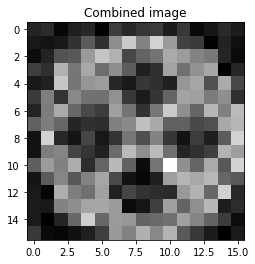

In [24]:
from pynufft import NUFFT
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat, savemat
import math
#

# Recon rGRE 3D using PyNUFFT CG method
## NUFFT object
NufftObj = NUFFT()
N = 16
Nd = (N,N)  # image size
print('setting image dimension Nd...', Nd)
Kd = tuple(2 * x for x in Nd)  # k-space size
print('setting spectrum dimension Kd...', Kd)
Jd = tuple(6 for x in Nd)  # interpolation size
print('setting interpolation size Jd...', Jd)

# Load ktraj & data
kt = loadmat('ute2d_sim_info.mat')['ktraj']
kk = loadmat('ute_signals.mat')['signal']
# Combine two reps in half pulse excitation scheme
kk_combined = kk[0::2,:] + kk[1::2,:]
#------------------------------------------------------------


# Scale [-pi, pi]
kt_sc = math.pi / np.max(np.absolute(kt))
kt = kt * kt_sc
# k-space trajectory (2D)
om = np.zeros((kt.shape[0] * kt.shape[1],2))
om[:, 0] = np.real(kt).flatten()
om[:, 1] = np.imag(kt).flatten()

NufftObj.plan(om, Nd, Kd, Jd)


#im = np.zeros((N, N, 20), dtype=complex)
im = NufftObj.solve(y=kk_combined.flatten(), solver='cg', maxiter=150)

images = np.absolute(im)
plt.imshow(images)
plt.title('Combined image')
plt.gray()
plt.show()

savemat(f'ute2d_image.mat', {'imspace': im})

